$\qquad$ $\qquad$$\qquad$  **TDA 232 / DIT 381: Home Assignment 4, part 1 - Image classification (20 points)** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Image classification using fully-connected and convolutional neural networks** <br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Emilio, Simon** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 22/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Ella Guiladi, 930509-0822, guiladi@student.chalmers.se and Josefine Eriksson, 961207-0962, joseerik@student.chalmers.se**<br />

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this notebook, and equations should be formatted using LaTeX math-mode.
* For each exercise part, add cells containing the requested text, code or figures into this notebook.
* Your notebook should contain all required cell output, so that we don't have to execute the code. However, should we decide to, your notebook should run and reproduce the results up to stochastic variability. A good idea is to make sure it runs on Google Colab before submission.
* **Submit your solutions as notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.

> **Note:** Training neural networks is computationally demanding and may take  time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simonpf/teaching/blob/master/machine_learning/2020/HW4a_2020.ipynb)

## Required software

For this assignment you will need to install the following Python packages:
- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (pre-installed in Google Colab)
- `torchvision`: Typically installed with pytorch
- `catsndogs`: The data set we will be working with. To install it, run:

```
pip install catsndogs

```

> **Note:** In Google Colab you can install packages using   `!pip  <package_name>`

In [1]:
pip install catsndogs


# Assignment 4, Part 1
# Theoretical exercises

## [Exercise 1: Backpropagation by hand, 1 point]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 3 features,  one hidden layer
with activations $\mathbf{y}_1$ and a one-dimensional output layer with activations $\mathbf{y}_2$.

![Neural network illustration.](https://raw.githubusercontent.com/simonpf/teaching/master/machine_learning/2020/simple_nn.png)


The activations of a layer $i$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}_i$ to the input activations $\mathbf{y}_{i - 1}$ producing the intermediate values $\mathbf{z}_i$:

$$
z_{i : j} = \sum_k W_{i:j, k} y_{i - 1:k} \\
$$

This is followed by the element-wise application of the layers'
activation function $f_i$ to the intermediate values $\mathbf{z}_i$:

$$
y_{i:j} = f_i (z_{i:j})
$$

> **Note:** The notation here uses '$:$' to separate layer from element indices. $W_{i:j,k}$ thus refers to the element in row $j$ and column $k$ in the weigth matrix $\mathbf{W}_i$ of the $i$th layer.


### 1, a)

Given the derivative of an error term $E$ with respect to the activation of the output neuron 
$\frac{dE}{dy_{2:0}}$, derive expressions for the derivatives of the error term with respect to the weights
$W_{i:j,k}$ and activations $y_{i:j}$ of the remaining layers of the network.

To simplify the results, you are encouraged to reuse derivatives you have already computeds in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dW_{2:i, j}} = \: ? \\
\frac{dE}{dy_{1:j}} = \: ? \\
\frac{dE}{dW_{1:i, j}} = \: ? \\
\frac{dE}{dy_{0:j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the error function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

### Answer: 1, a)


For simplicity when deriving the expressions, i represents the elements in the input layer, j the elements in the hidden layer and k the elements in the output (i=0,..,2, j=0,..,2 and k=0) and the numbers 0, 1 and 2 represents the respective layers. In this way, each index corresponds to the rows of one layer. 

Feedforward:
$$y_{0:i}={x_{i}}$$
$$y_{1:j}=f_{1}(z_{1:j})$$
$$z_{1:j}=\sum_{i=1}^{3}W_{1:j,i}y_{0:i}$$
$$y_{2:0}=f_{2}(z_{2:0})$$
$$z_{2:0}=\sum_{j=1}^{3}W_{2:0,j}y_{1:j}$$

The derivatives of the error function around a given layer is then calculated using the derivatives from the next higher layer as:

Backpropagation:
$$\frac{dE}{dW_{2:0, j}} = \frac{dE}{dy_{2:0}}\frac{dy_{2:0}}{dz_{2:0}}\frac{dz_{2:0}}{dW_{2:0,j}}=\frac{dE}{dy_{2:0}}f'_{2}(z_{2:0})y_{1:j}$$
$$\frac{dE}{dy_{1:j}}=\frac{dE}{dy_{2:0}}\frac{dy_{2:0}}{dz_{2:0}}\frac{dz_{2:0}}{dy_{1:j}}=\frac{dE}{dy_{2:0}}f'_{2}(z_{2:0})W_{2:0,j}$$
$$\frac{dE}{dW_{1:j,i}}=\frac{dE}{dy_{1:j}}\frac{dy_{1:j}}{dz_{1:j}}\frac{dz_{1:j}}{dW_{1:j,i}}=\frac{dE}{dy_{1:j}}f'_{1}(z_{1:j})y_{0:i}$$
$$\frac{dE}{dy_{0:i}}=\frac{dE}{dy_{1:j}}\frac{dy_{1:j}}{dz_{1:j}}\frac{dz_{1:j}}{dy_{0:k}}=\sum_{j}\frac{dE}{dy_{1:j}}f'_{1}(z_{1:j})W_{1:j,i}$$

## [Exercise 2: Loss function for binary classification, 1 point]

Assume that your task is to predict a binary class variable $Y \in \{0, 1\}$ conditional on some input $X$ using a neural network. To do so you want to train a network to predict the probability $p$ of a bernoulli distribution:

\begin{align}
P(Y | X) \sim \text{Bernoulli}(p = f(x)),
\end{align}

where $f$ represents the function to be learned by the neural network.

### 2, a)

Given independent pairs of samples $(x_1,  y_1), \ldots, (x_n, y_n)$ show that minimizing the binary cross entropy loss

\begin{align}
BCE = -\frac{1}{n}\sum_{i = 1}^n (1 - y)\log(f(x) - 1) + y\log(f(x))
\end{align}

maximizes the likelihood of the data.

> Hint: Note that the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(p)$ can be written $P(Y = y) = p^y\ (1- p)^{(1-y)}$

## [Exercise 2: Answer]
### 2, a)

The BCE is minimized by taking ithe derivtive with respect to f(x) and setting it equal to zero, such as:

$ \frac{\partial BCE}{\partial f(x)} = \frac{1}{n}\sum_{i = 1}^n \frac{(1 - y^{(i)})}{(1 - f(x))} - \frac{y^{(i)}}{(f(x))} = 0
\Rightarrow \frac{f(x)}{1-f(x)} = \frac{1}{n}\sum_{i=1}^n \frac{y^{(i)}}{1-y^{(i)}}, \\ $

resulting in,
$\Rightarrow \hat{f(x)} = \frac{1}{n}\sum_{i=1}^n y^{(i)}$


Due to,

\begin{align}
P(Y | X) \sim \text{Bernoulli}(p = f(x)),
\end{align}

One can write the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(f(x))$ as $P(Y = y) = f(x)^y\ (1- f(x))^{(1-y)}$.

By taking the logarithm of that function, the resulting expression is,

\begin{align}
\ln P(Y=y)=y\ln f(x)\ +(1- y)\ln(1-f(x)).
\end{align}

In order to maximize the likelihood of the data one takes the derivate w.r.t x and set the expression equal to zero, the following expression is obtained,

$
\frac{\partial log(L)}{\partial f(x)} = \sum_{i=1}^n \frac{y^{(i)}}{f(x)} - \frac{(1-y^{(i)})}{(1-f(x))} = 0, $

resulting in, 

$\hat{f(x)} = \hat{p} = \frac{\sum_{i=1}^n y^{(i)}}{n} $.

From these result it is possible to see that $\hat{f(x)}$ for minimizing the BCE is equal to $\hat{f(x)}$ for maximizing the likelihood of the data, i.e. minimizing the binary cross entropy loss is equal to mazimizing the likelihood of the data.

## [Exercise 3: Counting parameters in networks, 1 point]

### 2, a)
Imagine you apply a two layer fully connected network to a 28x28 rgb image. The hidden layer has dimension 256 and the output is of size 10. How many parameters are necessary? Include the bias parameters.

### 2, b)

Apply the following network to the same image, how many parameters are needed? Include bias parameters. Show your calculations.

* Convolutional layer with 8 3x3 filters (stride 1).

* Max pooling layer (2x2) (stride 2).

* Convolutional layer with 16 3x3 filter (stride 1).

* Fully connected layer to ouput of size 10.

## [Exercise 3: Answer]

### 2, a)
The number of (learnable) parameters in the input layer is o since all the input does is read the input image.

In a fully-connected layer, all input units have a weight for each output unit. For i inputs and k outputs, the number of weights are $i*k$. Furthermore, there is a bias term for each output node, resulting in $(i+1)*k$ parameters.

There are therefor $3\cdot 28 \cdot 28 \cdot 256 + 256 +256 \cdot 10+10 = 604938$ number of learnable parameters.

### 2,b)

**Input image size 3x28x28** 

The number of (learnable) parameters in the input layer is o since all the input does is read the input image.

**Convolutional layer with 8 3x3 filters (stride 1):** 

The size of the layer =8x26x26

The convolutional layer takes i feature maps at the input, and has k feature maps as output. The filter size is n x m and the 1 is for the bias term.

The number of parameters in a convolutional layer is given by: $(m\cdot n \cdot i+1)\cdot k$,

resulting in the following number of parameters: $((3\cdot 3\cdot 3)+1)\cdot 8)=224$.


**Max pooling layer (2x2) (stride 2).**

The size of the layer = 8x13x13

Since the pooling layes replace a 2x2 neighborhood by its maximum value, there is no learnable parameters here.

**Convolutional layer with 16 3x3 filter (stride 1).**

The size of the layer = 16x11x11

The same equation here as for previous convolution layer, i.e. the number of learnable parameters are:

$((8\cdot 3\cdot 3)+1)\cdot16=1168 $

**Fully connected layer to ouput of size 10.**

The parmameters in the fully connected layer is thereby given by (size of previous layer+1)$\cdot k$, which becomes,

$(16\cdot11 \cdot 11 + 1)10=19370$

The total amount of parameters for the network are thereby = 224+1168+19370=20762

## [Excercise 4: Calculating output dimensions of a convolutional layer, 1 point]

Assume you apply a convolutional layer with 8 3x3 filters (stride 1) on a rgb 28x13 image. What will the dimensions of the output be (assuming no padding is done in the convolution)?

## [Excercise 4: Answer

If we have an input image with WidthxHeight=28x13 and a filter size of 3x3 ($F_W x F_H$), the convolution output will be,

output width= $\dfrac{W-F_W+2P}{S_W}+1$

output height= $\dfrac{W-F_H+2P}{S_H}+1$,

where P=padding and S=stride (vertically or horisontally).

The output dimension:

* inputsize(width)-(filtersize-1) = 28-3+1= 26
* inputsize(height)-(filtersize-1) = 13-3+1= 11

The output dimension is thereby given by: 8x26x11

## [Excercise 5: Applying a filter to an image, 1 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}2 & 2 & 1 & 2 \\
               -2 & -2 & -1 & 1 \\
               1 & 1 & 2 & 1 \\
               1 & 1 & 3 & 1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}1 & 1
\\-1 & -1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. Try to give an explanation for the output, what is the filter detecting?

## [Excercise 5: Answer

By performing convolution with the a bias=-2 and stride=2 and then applying ReLU (i.e. all negativ elements are set to zero), the output will be a feature map, which is produced by sliding the 2x2 filter over the input image, element-wise multiply, and add the outputs. In order words, the filter is applied to the image in order to extract the local features, resulting in the following feature map:

\begin{align}
\\
\text{Feature map:}
\begin{bmatrix}6 & 1
\\0 & 0
\end{bmatrix}
\end{align}

# Practical exercises

In this practical exercise, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You wil do this using the `pytorch` deep learning framework.

## The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [0]:
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

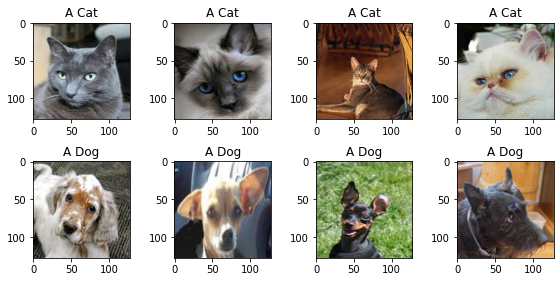

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [4]:
import torch
help(torch.tensor)

Help on built-in function tensor:

tensor(...)
    tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.as_tensor`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initial d

#### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [5]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


tensor([[[0.5608, 0.7529, 0.8353,  ..., 0.3098, 0.2824, 0.2510],
         [0.7333, 0.7804, 0.8118,  ..., 0.3059, 0.2941, 0.2745],
         [0.8980, 0.8549, 0.8157,  ..., 0.2980, 0.3020, 0.3059],
         ...,
         [0.0863, 0.0863, 0.0824,  ..., 0.3961, 0.4392, 0.5137],
         [0.0824, 0.0863, 0.0863,  ..., 0.3608, 0.4157, 0.4706],
         [0.0784, 0.0863, 0.0863,  ..., 0.3333, 0.3804, 0.4118]],

        [[0.5961, 0.7882, 0.8667,  ..., 0.3725, 0.3490, 0.3176],
         [0.7686, 0.8157, 0.8431,  ..., 0.3686, 0.3569, 0.3373],
         [0.9294, 0.8863, 0.8471,  ..., 0.3608, 0.3647, 0.3686],
         ...,
         [0.0863, 0.0863, 0.0902,  ..., 0.3294, 0.3725, 0.4471],
         [0.0824, 0.0863, 0.0941,  ..., 0.2941, 0.3490, 0.4039],
         [0.0784, 0.0863, 0.0941,  ..., 0.2667, 0.3137, 0.3451]],

        [[0.5922, 0.7843, 0.8745,  ..., 0.2196, 0.1843, 0.1529],
         [0.7647, 0.8118, 0.8510,  ..., 0.2157, 0.2039, 0.1843],
         [0.9373, 0.8941, 0.8549,  ..., 0.2157, 0.2118, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

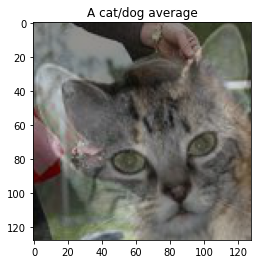

In [6]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [0]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [0]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Type conversions

As with `numpy.ndarray`s, the elements in a `torch.tensor` can have different data types. You can convert between different data types using the `to` member function.


In [9]:
print("The data type of p:", p.dtype)
p_short = p.to(torch.short)
print("The data type of p_short:", p_short.dtype)

The data type of p: torch.float32
The data type of p_short: torch.int16


For ML tasks you typically want to use [single-precision floating point numbers](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) (`torch.float32`). In general you will not have to worry too much about the data type, however, older versions of `pytorch` will throw errors when operations are performed on tensors with different numeric types.

In [10]:
p + p_short # Fails on older version of pytorch.

tensor([[0.5528, 0.3111, 0.6953, 0.3136, 0.4082, 0.7447, 0.7398, 0.3699, 0.2759,
         0.2960],
        [0.2494, 0.3507, 0.7402, 0.4637, 0.7400, 0.5170, 0.2938, 0.7214, 0.2145,
         0.7731],
        [0.5454, 0.8196, 0.6254, 0.5762, 0.5309, 0.1457, 0.1362, 0.1698, 0.6569,
         0.3088],
        [0.6741, 0.1980, 0.4109, 0.3366, 0.1590, 0.4869, 0.1007, 0.1680, 0.3377,
         0.7468],
        [0.7834, 0.4282, 0.3497, 0.5966, 0.3698, 0.5312, 0.6433, 0.2883, 0.2436,
         0.4195],
        [0.8655, 0.5133, 0.1874, 0.5723, 0.1239, 0.6395, 0.6787, 0.5150, 0.1890,
         0.3477],
        [0.1381, 0.6389, 0.6722, 0.7441, 0.8548, 0.6687, 0.3022, 0.6080, 0.2177,
         0.5845],
        [0.5764, 0.3576, 0.7849, 0.6227, 0.7509, 0.1133, 0.4346, 0.7133, 0.3978,
         0.1344],
        [0.1933, 0.2612, 0.2218, 0.4123, 0.6754, 0.3049, 0.6437, 0.5430, 0.8622,
         0.3790],
        [0.8365, 0.3158, 0.5005, 0.4951, 0.5525, 0.4443, 0.5513, 0.7838, 0.5132,
         0.3747]])

In [0]:
p2 = p + p_short.float() # short for p_double.to(torch.float32)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [12]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [13]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.67338397, 0.62268988],
       [0.2594267 , 0.3887058 ]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you copute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [0]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

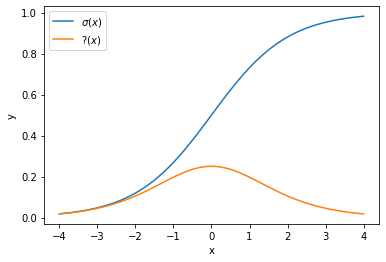

In [15]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

### [Exercise 1: Derivatives of activation functions, 1 point] 

Write down analytical expressions for the function $\sigma(x)$ and $?$ shown above.

### [Exercise 1: Answer

$\sigma(x)$ is the sigmoid activation function and $"?"$ its derivative. Their analytical expressions are the following:

$$\sigma(x)=\frac{1}{1+exp(-x)}$$
$$\sigma´(x)=\sigma(x)\cdot(1-\sigma(x))=\frac{exp(-x)}{(1+exp(-x))^2}$$

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, caluclations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards . GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. By default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor, you need to move its data to the GPU's memory.

In [16]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

True


Below, we will perform a quick demonstration of how much faster matrix multiplication becomes when executed on a  GPU.

In [17]:
W = torch.rand(512, 512)
def matmul_cpu():
    result = W
    for i in range(10):
        result = torch.matmul(W, result)
    return result
        
%time matmul_cpu()

CPU times: user 36.7 ms, sys: 3.06 ms, total: 39.7 ms
Wall time: 85.9 ms


tensor([[5.9628e+23, 6.1851e+23, 5.8608e+23,  ..., 5.9066e+23, 5.9249e+23,
         6.3019e+23],
        [6.0448e+23, 6.2702e+23, 5.9413e+23,  ..., 5.9878e+23, 6.0063e+23,
         6.3886e+23],
        [6.1507e+23, 6.3800e+23, 6.0454e+23,  ..., 6.0927e+23, 6.1115e+23,
         6.5005e+23],
        ...,
        [5.7010e+23, 5.9135e+23, 5.6034e+23,  ..., 5.6472e+23, 5.6647e+23,
         6.0252e+23],
        [5.6667e+23, 5.8780e+23, 5.5697e+23,  ..., 5.6133e+23, 5.6306e+23,
         5.9890e+23],
        [6.0392e+23, 6.2643e+23, 5.9358e+23,  ..., 5.9822e+23, 6.0007e+23,
         6.3826e+23]])

In [18]:
W_cuda = W.to(cuda)

def matmul_gpu():
    result = W_cuda
    for i in range(10):
        result = torch.matmul(W_cuda, result)
    return result
        
matmul_gpu() # First time using GPU can incur some overhead.
%time matmul_gpu()

CPU times: user 100 µs, sys: 29 µs, total: 129 µs
Wall time: 133 µs


tensor([[5.9628e+23, 6.1851e+23, 5.8608e+23,  ..., 5.9066e+23, 5.9249e+23,
         6.3019e+23],
        [6.0448e+23, 6.2702e+23, 5.9413e+23,  ..., 5.9878e+23, 6.0063e+23,
         6.3886e+23],
        [6.1507e+23, 6.3800e+23, 6.0454e+23,  ..., 6.0927e+23, 6.1115e+23,
         6.5005e+23],
        ...,
        [5.7010e+23, 5.9135e+23, 5.6034e+23,  ..., 5.6472e+23, 5.6647e+23,
         6.0252e+23],
        [5.6667e+23, 5.8780e+23, 5.5697e+23,  ..., 5.6133e+23, 5.6306e+23,
         5.9890e+23],
        [6.0392e+23, 6.2643e+23, 5.9358e+23,  ..., 5.9822e+23, 6.0007e+23,
         6.3826e+23]], device='cuda:0')

The `%time` command displays CPU and Wall time for the execution of the two functions. The CPU time is split up in `user` time, which is the time spent executing only your code, and `sys` time, which is the time spent executing system kernel code required for example to load data from disk. Note that the CPU time is computed per core, so when your code runs on multiple cores the resulting CPU time is the sum of the time each core spends computing.

The wall time shows the total time that it took to execute the function. Since CPU time is calculated per core, the wall time can actually be lower than the CPU time for code that is executed on multiple CPUs in parallel.

To compare the absolute execution time for the two functions it is therefore most meaningful to compare the displayed wall times. As you should see from them, calculating the matrix power on the GPU is substantially faster than calculating it on the CPU.

## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [0]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

images = ImageFolder(folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


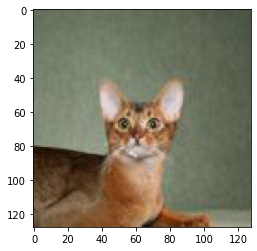

In [20]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [21]:
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [0]:
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [0]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data, validation_data = torch.utils.data.random_split(images, (n_train, n_val))

## [Exercise 2: Training a fully-connected network, 5 points]
## Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### 2, a) (2 points)

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the network of instances of the `FullyConnected` class?
- What activations functions are applied in the hidden layers?
- What activation function is used for the output?
- How are the parameters of the network initialized? Why is this important?

In [0]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        return x
    

## [Exercise 2: Answer

**What is the architecture of instances of the `FullyConnected` class?**

- Fully connected hidden layer: width neurons
- ReLU activation function
- Fully connected hidden layer: width neurons
- ReLU activation function
- Fully connected hidden layer: width neurons
- ReLU activation function
- Fully connected hidden layer: 1 neuron


**What activations functions are applied in the hidden layers?**

ReLu activation function


**What activation function is used for the output?**

There's no activation function for the output.


**How are the parameters of the network initialized? Why is this important?**

The aim of weight initialization is to prevent the vanishing/exploding gradient problem, since if the loss gradients are too large or too small, the network will take longer to converge, if it is even able to do so at all. nn.Linear Applies a linear transformation to the incoming data, with the variables:

- Linear.weight – the learnable weights of the module of shape $(\text{out_features}, \text{in_features})$. The values are initialized from $\mathcal{U}(-\sqrt{k}, \sqrt{k})$, where $k = \frac{1}{\text{in_ features}}$

- Linear.bias – the learnable bias of the module of shape $(\text{out_features})$. If bias is True, the values are initialized from $\mathcal{U}(-\sqrt{k}, \sqrt{k})$, where $k = \frac{1}{\text{in_ features}}$


## The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### 2, b) (1 point)

Look at the function below. Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.

In [0]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """

    Trains the given model on the training data provided by
    training loader using gradient descent.

    Arguments:
    
    model: The pytorch model to evaluate.
    
    validation_loader: Works as a Dataloader, used to iterate over validation data.

    training_loader: Works as a Dataloader, used to iterate over validation data.

    loss: Computes the loss in order to set training criteria

    optimizer: erforms the optimization method, i.e. gradient descent 
    
    device: Determines what to run the training on (cpu/gpu here)

    """
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += l.item()
    validation_loss /= n
    
    model.to(torch.device("cpu"))
        
    return (training_loss, validation_loss)

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between to training iterations.

### 2, c)  (0.5 points)

Complete the code below so that the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> **Hint 1:** The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> **Hint 2:** Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```

In [0]:
class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data = p.data-(learning_rate*p.grad)

## Training the network

With the optimizer, the model and the training loop in place we are close to being able to start training the network, however a few details remain to be sorted out.

The `training_data` and `validation_data` object defined above can be used to iterate over the data, but only on a per sample basis. For the training a neural network, however, we typically want to iterate through the data in batches. To take care of this , `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [0]:
from  torch.utils.data import DataLoader
training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize.

### 2, d) (0.5 points)

Choose a suitable loss function from the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module and assign an instance of it to the loss variable in the code cell below

> **Hint:** Note that in the `train_epoch` function defined above loss function is applied **directly** to the output of the network. In your choice of the loss function you thus need to consider the output activation of the network.

In [0]:
loss = nn.BCEWithLogitsLoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [0]:
if torch.cuda.is_available():
    device = cuda
else:
    device = cpu

### 1, e) (1 point)

Train the neural network for a least 10 epochs, then reduce the learning rate and continue training for at least another ten epochs. Plot the resulting training and validation losses. Was the training successful?


Text(0.5, 1.0, 'Training and validation loss over 20 epochs')

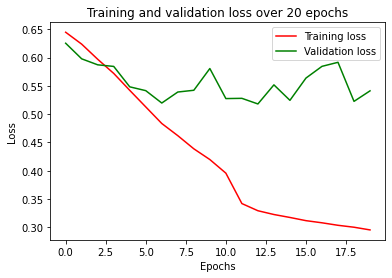

In [36]:
learning_rate=0.01

modelFC=FullyConnected(3*128*128,10)
optimizerNet=GradientDescent(modelFC.parameters(),learning_rate)
epochs=20
training_loss_vec=[]
validation_loss_vec=[]

training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

for i in range(epochs):
    (training_loss, validation_loss)=train_epoch(training_loader, validation_loader, modelFC, loss, optimizerNet, device)
    if i==10:
        learning_rate=0.001
        optimizerNet=GradientDescent(modelFC.parameters(),learning_rate)
    training_loss_vec.append(training_loss)
    validation_loss_vec.append(validation_loss)
    
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss over 20 epochs')



### 1, e) Answer
From the plot it is possible to see that the model fits accordingly to the training data due to the low training loss. However, it does not fit as well to the validation data, i.e. it's not generalizing correctly to unseen data (overfitting). This indicates that the training was not succesfull since the model overfits the data.

## [Exercise 3: Training on augmented training data, 3 points]

If you trained the model long enough, you should see that the model overfits on the training data, which 
causes the generalization error to increase.  This is not surprising considering that the training set is rather small. A technique to counteract overfitting is to augment the training data by artificially increasing the size of the training data set. In this case we will use random transforms that mimic the effect of perspective or changes in lighting to the images.

### 3, a) (1 point)

Create an augmented training data set by adding suitable transforms from the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) module to the transformations that are applied when
the images are loaded. Suitable transforms to consider are `RandomAffine` and `ColorJitter`.

> **Hint**: Applying these transforms of course only makes sense for the training data and not the validation
 data. To ensure that this is the case do not create new `training_data` and `validation_data` objects but instead overwrite the `training_data.dataset` attribute of the existing `training_data` object, as shown below. (This is a bit hacky, but the easiest way to achieve this in the current context.)
 

In [71]:
import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize, ColorJitter, RandomAffine
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

data_augmented = Compose([RandomAffine(30), ColorJitter(brightness=0.3, contrast=0.6, saturation=0.3, hue=0.2), 
                      ToTensor(),Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
images_augmented = ImageFolder(folder, transform=data_augmented)
training_data.dataset = images_augmented


2652
2947


Let's look at a preview of the augmented training data.

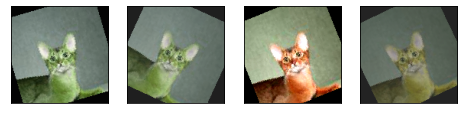

In [45]:

f, axs = plt.subplots(1, 4, figsize=(8, 2))
for i in range(4):
    ax = axs[i]
    ax.imshow(to_image(images_augmented[0][0]))
    ax.set_xticks([])
    ax.set_yticks([])

### 3, b) (1 point)

Train the fully-connected model once again on the augmented training data. You should achieve a validation loss lower than 0.6. Plot training and validation loss.

Text(0.5, 1.0, 'Training (red) and validation (green) loss on the augmented dataset')

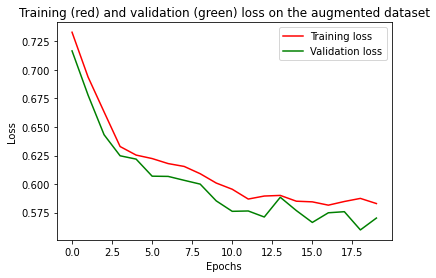

In [60]:
learning_rate=0.01

modelFC_aug=FullyConnected(3*128*128,10)
optimizerNet=GradientDescent(modelFC_aug.parameters(),learning_rate)
epochs=20
training_loss_vec=[]
validation_loss_vec=[]

training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

for i in range(epochs):
    (training_loss, validation_loss)=train_epoch(training_loader, validation_loader, modelFC_aug, loss, optimizerNet, device)
    if i==10: 
      learning_rate=0.001
      optimizerNet=GradientDescent(modelFC_aug.parameters(),learning_rate)
    training_loss_vec.append(training_loss)
    validation_loss_vec.append(validation_loss)
    
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training (red) and validation (green) loss on the augmented dataset')

### 3, c) (1 point)

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC. What is the significance of the line black, dashed line?

In [0]:
def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.
    
    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
        
    """
    tpr=[]
    fpr=[]
    
    
    for psi in ps:
        fp=0
        fn=0
        tp=0
        tn=0
        
        for i,(x,y) in enumerate(validation_loader):
            y_pred_ps= torch.sigmoid(model(x)) >= psi

            for j in range(len(y_pred_ps)):
                if y[j]==1 and y_pred_ps[j]==1:
                  tp+= 1
                if y[j]==1 and y_pred_ps[j]==0:
                  fn+= 1
                if y[j]==0 and y_pred_ps[j]==1:
                  fp+= 1
                if y[j]==0 and y_pred_ps[j]==0:
                  tn+= 1 
                        
        fpr.append(fp/(fp+tn))
        tpr.append(tp/(tp+fn))

    print(fpr,tpr)   
    return fpr, tpr


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9880952380952381, 0.9880952380952381, 0.9880952380952381, 0.9880952380952381, 0.9880952380952381, 0.9880952380952381, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9404761904761905, 0.9285714285714286, 0.9166666666666666, 0.8928571428571429, 0.8809523809523809, 0.8809523809523809, 0.8690476190476191, 0.8214285714285714, 0.8214285714285714, 0.7738095238095238, 0.7738095238095238, 0.7619047619047619, 0.7261904761904762, 0.6666666666666666, 0.6428571428571429, 0.6190476190476191, 0.5952380952380952, 0.4880952380952381, 0.35714285714285715, 0.2976190476190476, 0.25, 0.20238095238095238, 0.17857142857142858, 0.16666666666666666, 0.13095238095238096, 0.11904761904761904, 0.08333333333333333, 0.05952380952380952, 0.05952380952380952, 0.03571428571428571, 0.03571428571428571, 0.035714285714285

Text(0.5, 1.0, 'Receiver operator characteristic')

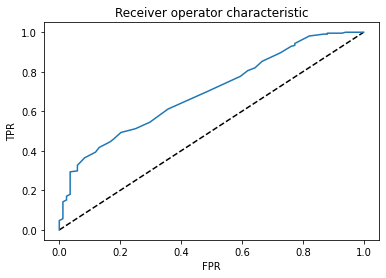

In [75]:

fpr, tpr = receiver_operating_characteristic(modelFC_aug, validation_loader, np.linspace(0, 1, 101))

# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--")
ax.plot(fpr, tpr)
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic")

### 3, c) Answer

The dotted black line represents points where sensitivity (TPR) = 1-specificity (FPR). A random guess would give a point along this dotted diagonal line. The higher up in the left corner a point gets, the better is the prediction from the model.

Finally, let's look at the prediction for samples from the validation set. On average, your model should get more images right than wrong.

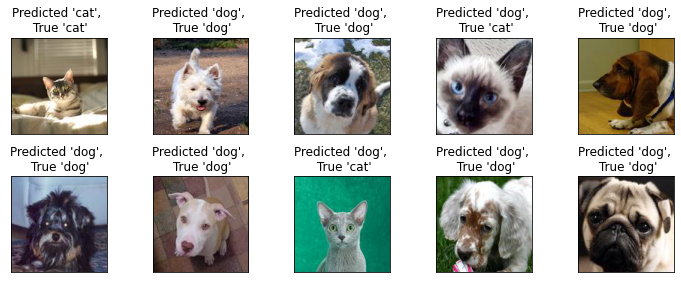

In [76]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

plot_results(modelFC, validation_data)


## [Exercise 4: Training a convolutional  neural network, 4 points]

### 4, a) (2 points)

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $32$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $64$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- 2D conv. layer: $128$ filters, kernel size $3 \times 3$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- Fully connected: 512 neurons
- ReLU activation function
- Fully connected: 512 neurons
    
With this architecture, you should achive a validation loss below $0.3$. 

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

In [0]:
from torch.nn import Conv2d, Linear
#from torch.functional import max_pool2d, log_softmax
from torch import nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool1 = nn.MaxPool2d(4,4)
        self.conv2 = nn.Conv2d(32,64,5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(64,128,3)
        self.pool3 = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(3200,1024) #added features to make the architecture more complex
        self.fc2   = nn.Linear(1024,1)
      

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = self.pool3(x)
        x = x.flatten(1, -1)
        #print(x.shape)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
                
        return x

Text(0.5, 1.0, 'Training (red) and validation (green) loss over 20 epochs')

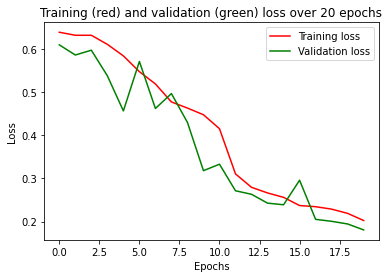

In [173]:
learning_rate=0.5

modelCNN=ConvNet()
optimizerNet=GradientDescent(modelCNN.parameters(),learning_rate)
epochs=20
training_loss_vec=[]
validation_loss_vec=[]

training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

for i in range(epochs):
    (training_loss, validation_loss)=train_epoch(training_loader, validation_loader, modelCNN, loss, optimizerNet, device)
    if i==10: # changes the learningrat
        learning_rate=0.05
        optimizerNet=GradientDescent(modelCNN.parameters(),learning_rate)
    training_loss_vec.append(training_loss)
    validation_loss_vec.append(validation_loss)

    
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training (red) and validation (green) loss over 20 epochs')


### 4, a)  (2 points)

Tune the network architecture and training routin to achieve a validation error lower than 0.15 on the validation set. Some things you may want to try:
- Increasing the complexity of your network (more layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping

## [Exercise 5: Evaluation on test set, 2 points]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot of 8 images from the test set together with the prediction from the convolutional model.

In [0]:
#import test data
from catsndogs.test import folder
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Normalize

images = ImageFolder(folder)
transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
test_data = ImageFolder(folder, transform=transform)

test_loader=DataLoader(test_data, batch_size=32,shuffle=True)


def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, test_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 4, figsize=(10, 4))
    for i in range(8):
    
        # Make prediction on random validation sample
        index = np.random.randint(len(test_data))
        x, y = test_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.99581589958159, 0.9916317991631799, 0.9916317991631799, 0.9874476987447699, 0.9874476987447699, 0.9832635983263598, 0.9748953974895398, 0.9456066945606695, 0.9414225941422594, 0.9288702928870293, 0.9121338912133892, 0.9079497907949791, 0.899581589958159, 0.8786610878661087, 0.8619246861924686, 0.8451882845188284, 0.8200836820083682, 0.7698744769874477, 0.7447698744769874, 0.7196652719665272, 0.6778242677824268, 0.602510460251046, 0.5271966527196653, 0.38493723849372385, 0.3305439330543933, 0.301255230125523, 0.28451882845188287, 0.25523012552301255, 0.2175732217573222, 0.18828451882845187, 0.1589958158995816, 0.13807531380753138, 0.11297071129707113, 0.09205020920502092, 0.0794979079497908, 0.07531380753138076, 0.06694560

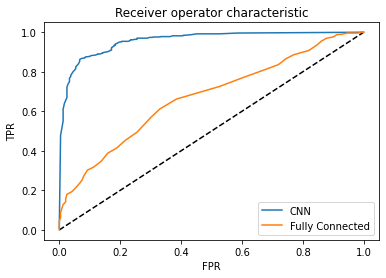

In [176]:

fprFC, tprFC = receiver_operating_characteristic(modelFC_aug, test_loader , np.linspace(0, 1, 101))
fpr, tpr = receiver_operating_characteristic(modelCNN, test_loader , np.linspace(0, 1, 101))

# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--")
ax.plot(fpr, tpr, label='CNN')
ax.plot(fprFC, tprFC, label='Fully Connected')
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic")
ax.legend()


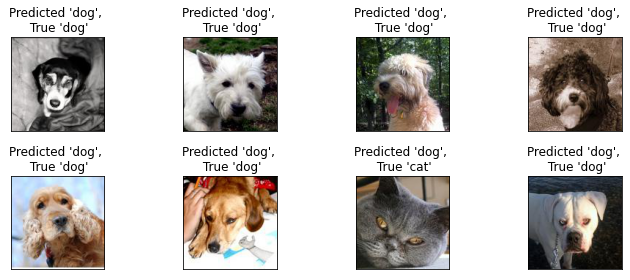

In [177]:
plot_results(modelCNN,test_data)

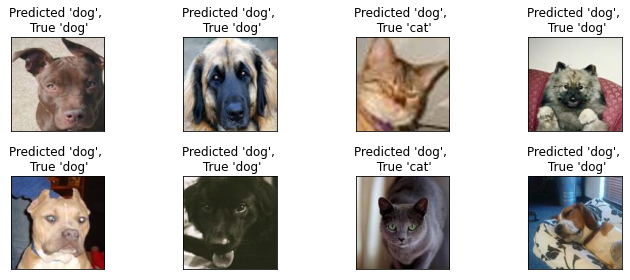

In [183]:
plot_results(modelFC_aug,test_data)

In [182]:
def accuracy(model,validation_loader):  
    
    tpr=[]
    fpr=[]
    

    fp=0
    fn=0
    tp=0
    tn=0

    for i,(x,y) in enumerate(validation_loader):
        y_pred_ps= torch.sigmoid(model(x)) >= 0.5

        for j in range(len(y)):
            if y[j]==1:
                if y_pred_ps[j]==1:
                    tp+=1
                else:
                    fn+=1
            else:
                if y_pred_ps[j]==0:
                    tn+=1
                else:
                    fp+=1   

    fpr.append(fp/(fp+tn))
    tpr.append(tp/(tp+fn))

    accuracy=(tp+tn)/(tp+tn+fp+fn)
    return accuracy
    

accuracyCNN=accuracy(modelCNN,validation_loader)  
accuracyFC=accuracy(modelFC_aug,validation_loader) 
print('The accuracy for the Convolution Network is:',accuracyCNN)
print('The accuracy for the Fully Connected Network is:',accuracyFC)

The accuracy for the Convolution Network is: 0.9152542372881356
The accuracy for the Fully Connected Network is: 0.7322033898305085


## [Exercise 6 (Bonus*): Your algorithm in the wild, 2 points]

Acquire an image of a cat or dog resize it to size $64 \times 64$ pixels and apply your model to it. Present your results. Does it work?


*: This is bonus exercise and will give you two point that can make up for a point lost somewhere in the assignment.